### FoodHub Data Analysis

### Objective

The main goal is to understand the demand for various restaurants, aiming to improve the overall customer experience. To accomplish this, an in-depth data analysis, including both statistical multivariate and univariate analyses, was conducted to extract insights from the data.

### What did I do
* Data cleaning
* Exploratory data analysis (EDA) using univariate, bivariate and multivariate statistical analysis
* Writing the project conclusions and recommendations for business decisions

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### import the required libraries

In [60]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [61]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [62]:
# creating a copy of the data to avoid any changes to the original data
df = df.copy()

In [63]:
# returs the last five rows of the data 
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [64]:
# returns the shape of the data by providing the number of rows (R) and columns (C)
df.shape

(1898, 9)

#### Observations: 

1. The data consist of 1898 rows and 9 columns 


In [65]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

1. The data contains attributes of different types (int, float and object). 
2. All columns have 1898 observations indicating no null observations 


In [66]:
# Checking missing values
#df.isna().sum()
df.isnull().values.any()

False

#### Observations: 

The output of the above code (**False**) implies that **there are no missing values in the data**.

### Checking the statistical summary of the data.

In [67]:
# returns the summary statistics of the numerical variables only 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
1. The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20, 27 and 35 minutes respectively.
2. The minimum and average cost of the order ranges from 4.47 to 35.41 with an average of 14.14
3. The delivery times range from 15 to 33 minutes with an avaerage of 25 minutes.

In [68]:
# returns the summary statistics of the categorical or non-numerical variables only
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
4. The variable "restaurant_name" has 178 unique categories. The category Shake Shack showed the most occurance with a frequency of 219.
5. The variable "cuisine_type" has 14 unique categories, out of which the category American occured 584 times in the data.
6. The variable "day_of_the_week" consists of two distinct categories. Among these categories, the one labeled "Weekend" was the most frequent in the dataset, occurring 1351 times.
7. The variable "rating" has 4 unique categories out of which the category "Not given" occured 736 times in the data.

In [69]:
# returns the count of each unique category and make a list of all categorical variables 
cat_col = ['restaurant_name', 'cuisine_type', "day_of_the_week", "rating"]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------
rating
N

#### Observations:

8. The top five restaurants that received the highest number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.
9. The five restaurants with the lowest number of orders (1 order each) include Sushi Choshi, Dos Caminos Soho, La Follia, Philippe Chow, and "wichcraft." 
10. The most ordered cuisines are American, Japanese, Italian, Chinese, and Mexican, while Korean, Spanish, and Vietnamese cuisines are less commonly ordered.
11. The majority of orders, totaling 1351, are placed on weekends, while there are 547 orders made on weekdays.


### Determining the number of orders that are not rated

In [70]:
## returns the counts of the rating of the orders
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

1. A total of 736 orders were not rated and this is indicated in the data as "Not given". 
2. On the sacle of 1 to 5, the minimum and maximum rating were 3 and 5 respectively.
2. Among the total of 1898 orders, 588 received the top rating of 5, and 188 orders were rated with the lowest score of 3.

### Exploratory Data Analysis (EDA)

#### Order ID

In [71]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Observation:
There are 1898 unique order ID's in the data. Suggesting all the orders made are given uniqie IDs

#### Customer ID

In [72]:
# check unique order ID
df['customer_id'].nunique()  

1200

#### Observation:
There are 1200 unique customer IDs out of 1898 orders placed

#### Restaurant name

In [73]:
# returns the number of unique order ID
df['restaurant_name'].nunique()  

178

#### Observation:
There are 178 unique restaurant names in the data. The presence of 178 distinct restaurant names in the dataset indicates that FoodHub is comprised of a conglomerate of 178 individual restaurants.

#### Cuisine type

In [74]:
# returns the number unique order ID
df['cuisine_type'].nunique()  

14

#### Observation:
There are 14 disticnt cuisine types stores in the data as "cuisine_type".

#### Counter plot for cuisine type

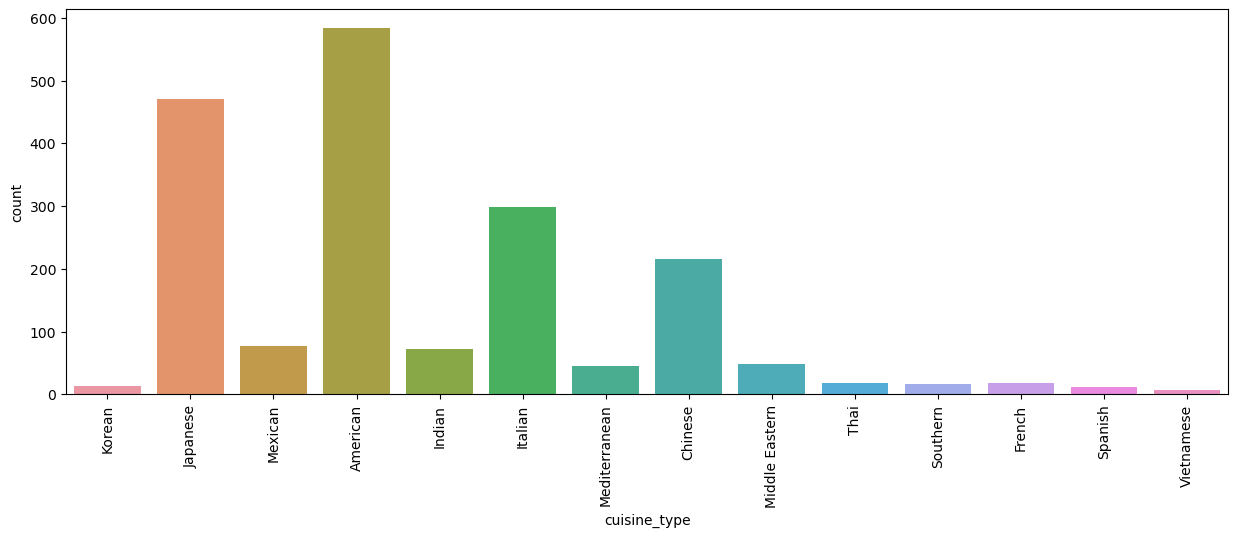

In [75]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## returns a countplot for cuisine types.
plt.xticks(rotation=90)
plt.show()

#### Observations:
1. A noticeable distinction can be observed in the cuisine types that receive the highest number of orders.
2. The figure above illustrates that, in descending order of occurrence within the data, American, Japanese, Italian, Chinese, and Mexican cuisines are the most commonly represented.

#### Cost of order

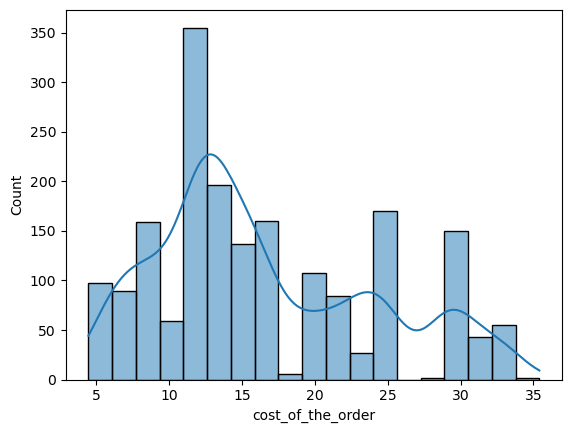

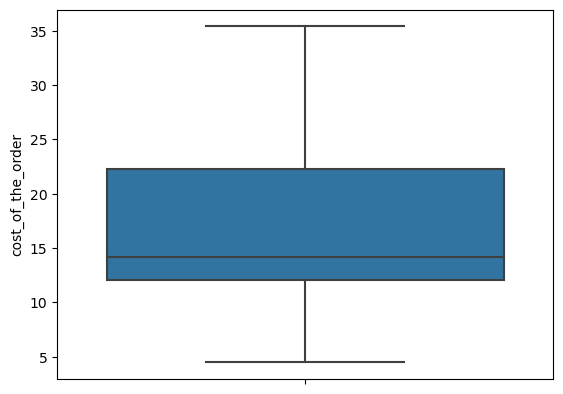

In [76]:
sns.histplot(data=df,x='cost_of_the_order', kde=True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,y='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

#### Observations:
1. There are no outliers in this variable as observed in the boxplot.
2. The histogram plot shows that there are one major peak and two sub peaks representing three population of cost of the order.
3. The majority of observations are concentrated around values of 15 (major peak), 23 (second peak), and 30 (third peak), indicating that most orders had a cost of approximately 15 dollars, with 23 and 30 dollars representing the lower end of the cost of order distribution. 
4. The dobserved distribution is multi modal with three peaks.


#### Delivery time

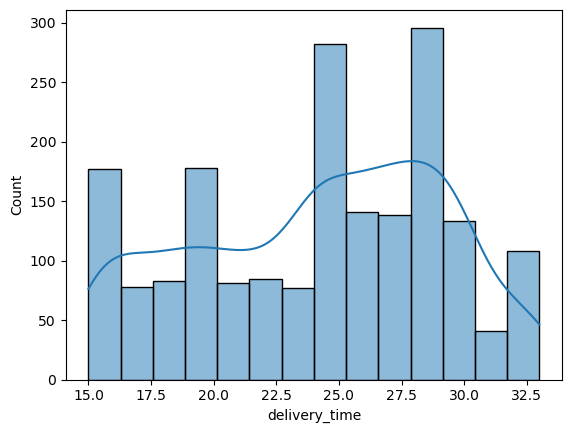

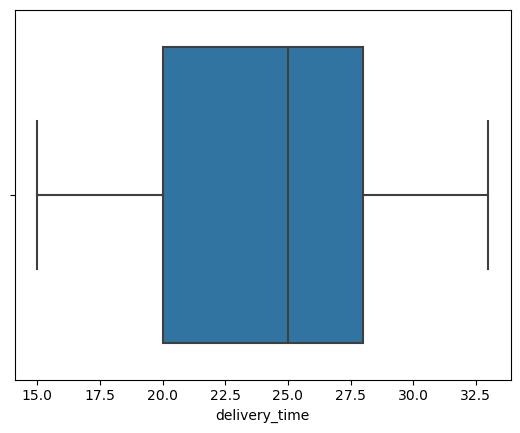

In [77]:
sns.histplot(data=df,x='delivery_time', kde=True) ## code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## code to plot the boxplot for the delivery time
plt.show()

#### Observations:
1. There are no outliers in this variable as observed in the boxplot. The position of the median black line in the box plot suggest the data in this variable is skewed to the left. 
2. The plot shows that most of the observations lie between 25 and 30 i.e. majority of the delivery time fall batween 25 and 30 minutes.
3. The distribution is not symmetric and shows skeweness to the left of the distribution.


#### Day of the week

In [78]:
# # Check the unique values
df['day_of_the_week'].nunique() ## code to check unique values for the 'day_of_the_week' column

2

In [79]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()  

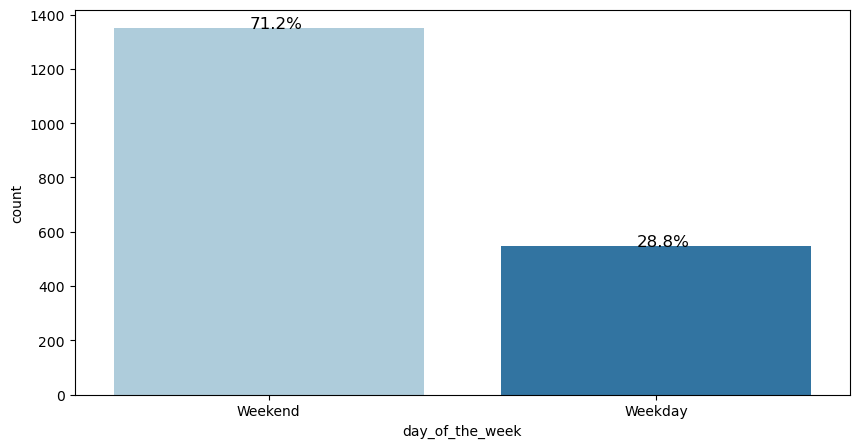

In [80]:
bar_perc(df, 'day_of_the_week') ## returns the customize bar plot of the count of the orders between weekday and weekends with their percentages

#### Observations:
1. There are two unique observations contained in this variable. Oeders placed on Weekend and Weekday, respectively.
2. The majority of orders, accounting for 71%, are placed on weekends, while only one-third of the orders occur on weekdays.

#### Rating

In [81]:
# Check the unique values
df['rating'].nunique() ## code to check unique values for the 'rating' column

4

<Axes: xlabel='rating', ylabel='count'>

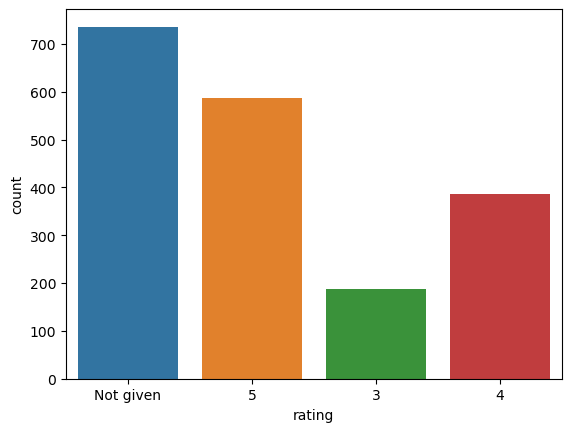

In [82]:
sns.countplot(data = df, x = 'rating')

#### Observations:
1. This variable contains four distinct observations, which include three values representing ratings on a scale of 1 to 5 and a categorical variable ("Not given") indicating the absence of a rating.
2. A considerable portion of customers did not provide a rating following the delivery.
3. It appears that the majority of people are satisfied with the service, as most of the ratings are either 4 or 5. 

#### Food preparation time

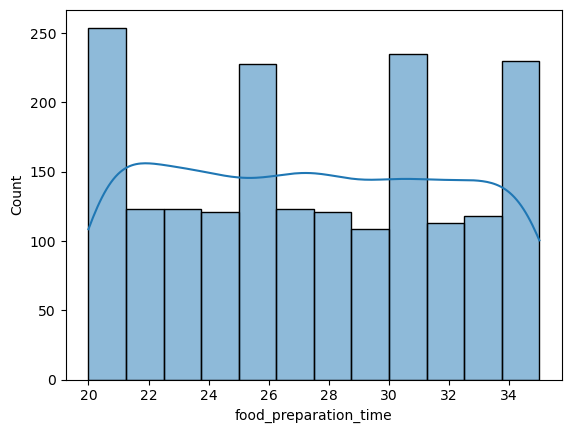

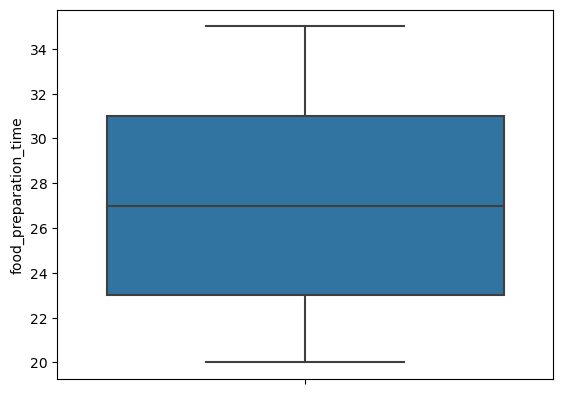

In [83]:
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df,y='food_preparation_time')
plt.show()

#### Observations:
1. There are no recognizable outliers in this variable.
2. The distribution indicate a normally distributed continous variable. This is shown in the boxplot.
3. The histogram plot reveals that the majority of observations fall within the range of 22 to 34 minutes. This suggests that, most of the time, the food preparation time after an order is placed typically falls within this 22 to 34-minute timeframe.

In [84]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
The top five restaurants, listed in descending order of the number of orders they've received, are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### Geting the most popular cuisine on weekends?

In [85]:
df_weekend = df[df["day_of_the_week"]=="Weekend"] ## filters the column day_of_the_week and returns only those assigned weekends
df_weekend["cuisine_type"].value_counts() ## returns a count of the counts of the cuisines ordered on weekends only.

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
The most popular cuisine on the weekends is America


### Percentage of the orders that cost more than 20 dollars?

In [86]:
# returns orders that cost more than 20 dollars
df_greater_than_20 = df[df["cost_of_the_order"] > 20]
#df_greater_than_20
len(df_greater_than_20)

555

In [87]:
# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
The percentage of orders that that cost more than 20 dollars is approximately 29% 


### Mean order delivery time

In [88]:
mean_delivery_time = df["delivery_time"].mean() ## returns the mean delivery time of the orders
print("The mean delivery time of the orders is ", round(mean_delivery_time, 2), "minutes")

The mean delivery time of the orders is  24.16 minutes


#### Observations:
The mean order deleivery time is approximately 24 minutes


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. We then find the IDs of these customers and the number of orders they placed

In [89]:
df["customer_id"].value_counts().head(3) ## returns the counts of customer_id and output the first 3 rows

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The IDs of the top three most frequent customers eligible for a 20% discount are 52832, 47440, and 83287.

### Multivariate Analysis

In [90]:
#sns.pairplot(data=df[['normalized_losses','wheel_base','curb_weight','engine_size','price','peak_rpm']])

#### Cuisine versus Cost of the order

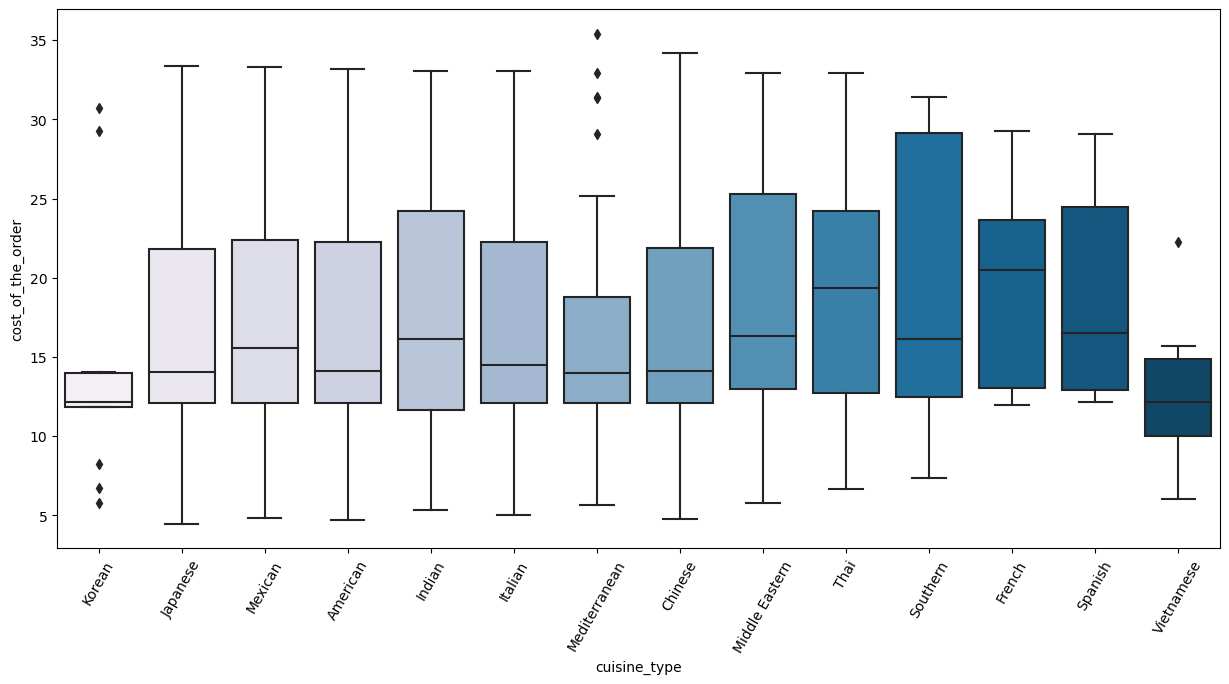

In [91]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:
1. There is a noticeable difference in the median cost of orders among different cuisines, with French cuisine having the highest median cost and Vietnamese cuisine having the lowest.
2. The cost of orders in the Southern cuisine category exhibits relatively high variability, whereas the Korean cuisine category shows lower variability.
3. The Korean, Mediterranean, and Vietnamese cuisines contain some outliers within their data.
4. The Chinese cuisine type displays the widest range of costs for orders.

#### Cuisine versus Food Preparation Time

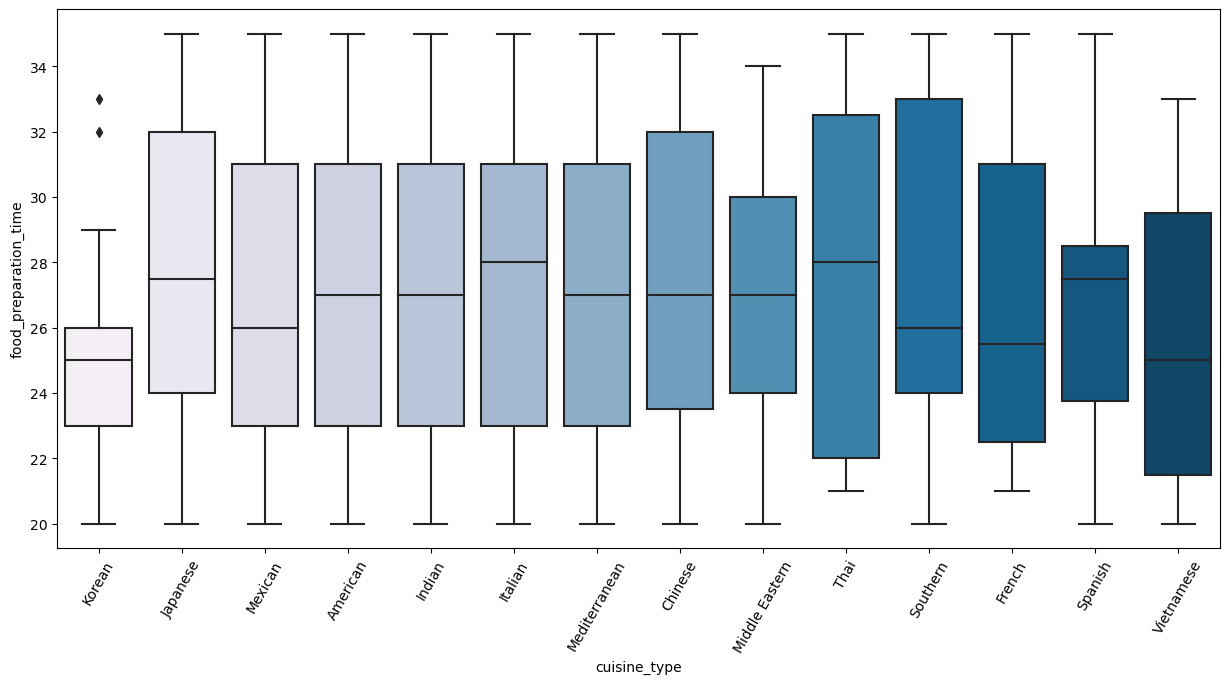

In [92]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:
1. Korean cuisine is prepared relatively quickly, with only two observations considered as outliers in terms of preparation time.
2. Italian, Spanish, and Thai cuisines have higher median food preparation times compared to others.
3. Most cuisines, including Japanese, Mexican, American, Indian, Mediterranean, and Chinese, have a similar range of food preparation times.

#### Day of the week versus Delivery Time

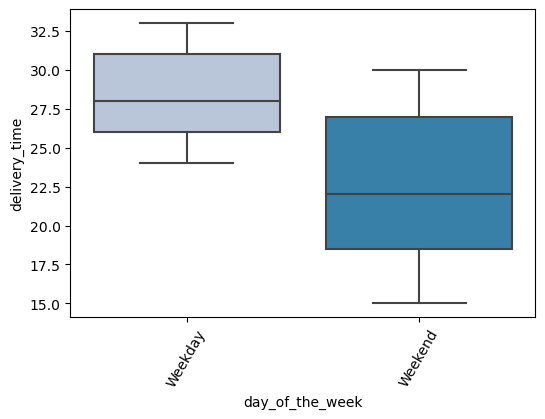

In [93]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(6,4))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:
1. The median delivery time is shorter on weekends compared to weekdays, indicating that orders are delivered more quickly on weekends than on regular weekdays.
2. The median delivery time on weekends is approximately 22 minutes, while on weekdays, it is around 28 minutes.
3. No outliers are apparent in the data.

#### Revenue generated by the restaurants

In [94]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10) ## group the restaurant names by the sum of the cost of order and output the first 10 rows

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

In [95]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).tail(10)

restaurant_name
Gaia Italian Cafe                8.78
Chola Eclectic Indian Cuisine    8.73
Woorijip                         8.25
'wichcraft                       8.10
La Follia                        8.05
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, dtype: float64

#### Observations:
1. The top five restaurants with the highest revenue generation, listed in descending order, are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
2. The five restaurants with the lowest revenue generation are Market Table, Wa Jeal, Cipriani Le Specialita, Big Wong Restaurant, and Hunan Manor.

#### Rating versus delevery

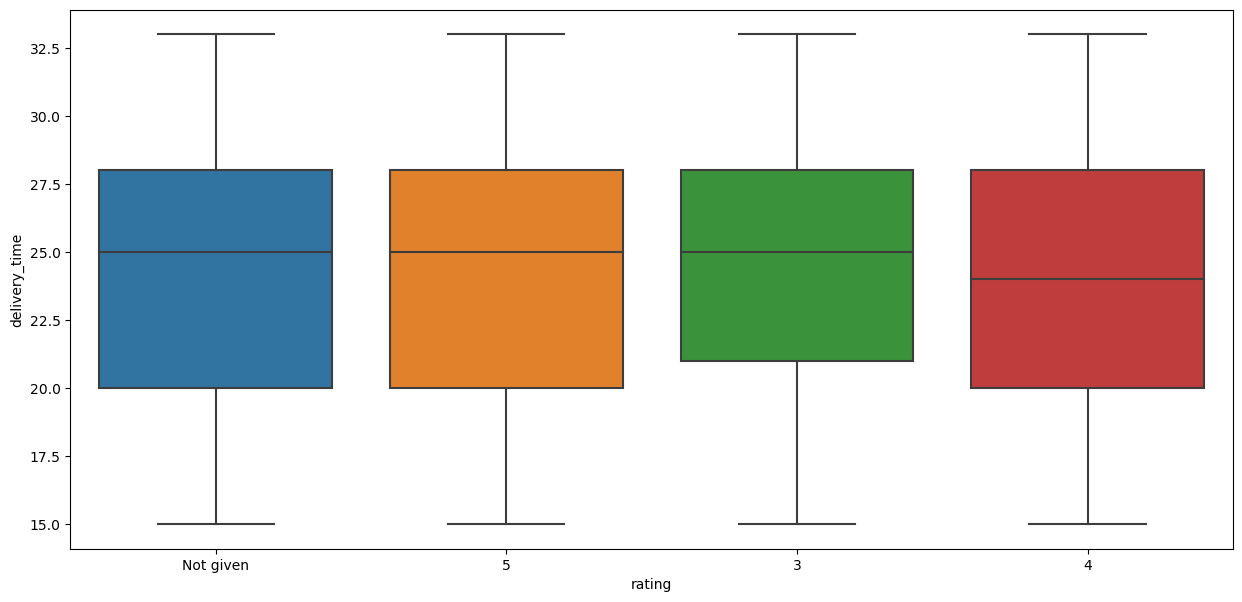

In [96]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
#sns.boxplot(x = 'rating', y = 'delivery_time', data = df, errorbar=('ci', 0), color = "RED")
sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observation:
The rating marginally varies with the mean delivery time

#### Ratings versus Food Preparation Time

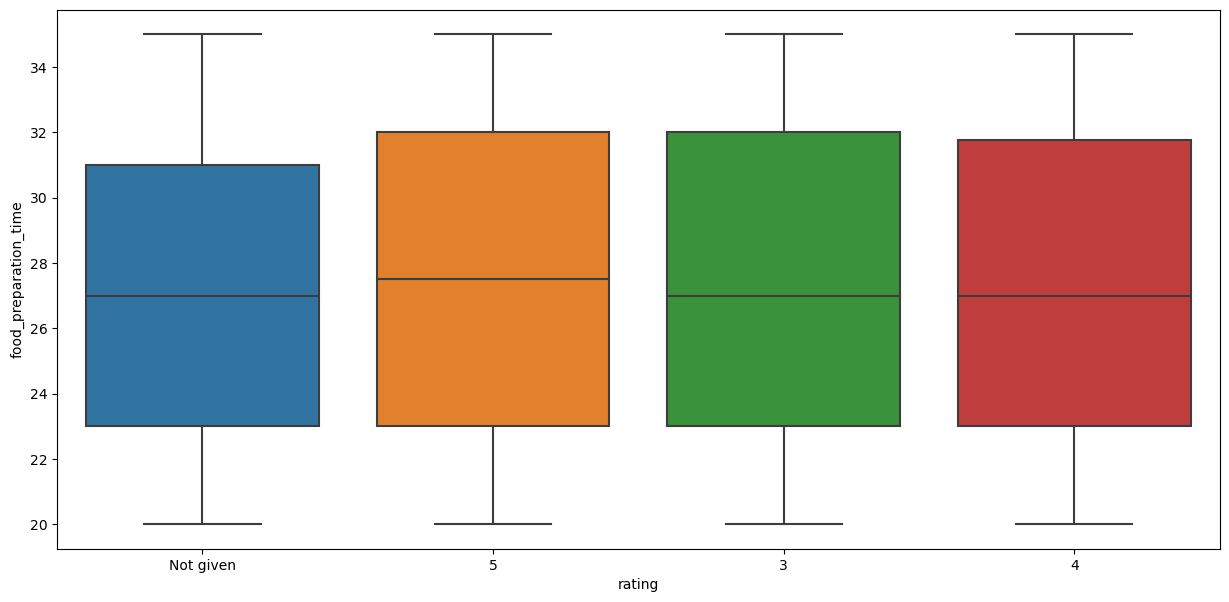

In [97]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Observation:
The rating marginally varies with the mean food preparation time

#### Ratings versus Cost of the Order

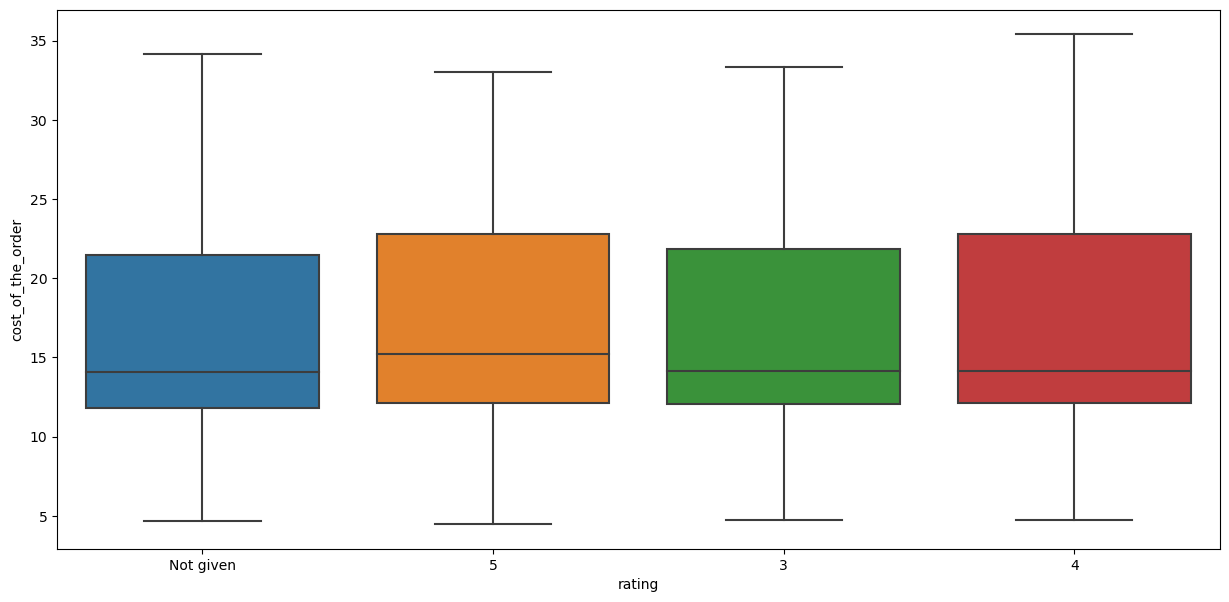

In [98]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Observation:
The rating marginally varies with the mean const of the order

#### Correlation Among Variables

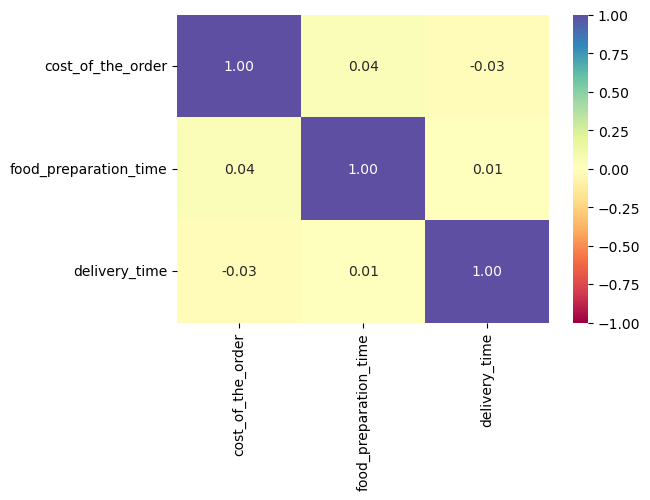

In [99]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(6, 4))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='Spectral')
plt.show()

#### Observation:
There is no significant correlation between food preparation time, delivery time, and the cost of the order.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. The restaurants that satisdied the conditions above are determined

In [100]:
# Filter the rated restaurants and remove all the ones that are not rated
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['numeric_rating'] = df_rated['rating'].astype('int')  

In [101]:
df_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numeric_rating
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,3
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,3
...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,3
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,5
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,5


In [102]:
df_rated["numeric_rating"].isnull().values.any()

False

In [103]:
# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['numeric_rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,numeric_rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [104]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count["numeric_rating"]>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50


In [105]:
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [106]:
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

In [107]:
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(["restaurant_name"])["numeric_rating"].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,numeric_rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observation:
The restaurants that fulfill the promotional creteria stated above include; **The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.**  

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Here the net revenue generated by the company across all orders is established

In [108]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df["Revenue"] = df["cost_of_the_order"].apply(compute_rev) ## Create additional column to store the the computed revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [109]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The net revenue generated by the company across all orders is 6166.3 dollars


### The company wants to analyze the total time required to deliver the food. The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is estimated

In [110]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270,54


In [111]:
# Get orders that take more than 60 minutes to get delivered from the time the order is placed
df_time_greater_60mins = df[df["total_time"]>60] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the delivery time is more than 60 minutes
print('The number of total orders that take more 60 minutes to get delivered from the time the order is placed is:', df_time_greater_60mins.shape[0])

# Calculate percentage of such orders in the dataset
percentage_more_60mins = (df_time_greater_60mins.shape[0] / df.shape[0]) * 100

print("The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is:", round(percentage_more_60mins, 2), '%')

The number of total orders that take more 60 minutes to get delivered from the time the order is placed is: 200
The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is: 10.54 %


#### Observations:
1. The number of total orders that take more 60 minutes to get delivered from the time the order is placed is: 200
2. The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is: 10.54 %

### The delivery time of the orders on weekdays and weekends are analyzed.

In [112]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
# Get the standard deviation delivery time on weekdays and print it
print('The standard deviation of delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].std()),
     'minutes')

# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')
# Get the standard deviation delivery time on weekends and print it
print('The standard deviation of delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].std()),
     'minutes')


The mean delivery time on weekdays is around 28 minutes
The standard deviation of delivery time on weekdays is around 3 minutes
The mean delivery time on weekends is around 22 minutes
The standard deviation of delivery time on weekdays is around 5 minutes


#### Observations:
1. The mean delivery time on weekdays is around 28 minutes
2. The standard deviation of delivery time on weekdays is around 3 minutes
3. The mean delivery time on weekends is around 22 minutes
4. The standard deviation of delivery time on weekdays is around 5 minutes
5. The results indicate that, on average, the delivery is completed more quickly. 

### Conclusion and Recommendations

### Conclusions:
A Comprehensive anaylsis of the fata has been performed to gain insights into the preferences and demands of the diverse restaurant offerings, FoodHub has collected data on customer orders through their online platform. 
 
Analysis of the data allows for the following conclusions:

1. The top five restaurants that received the highest number of orders are **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.**
2. The most ordered cuisines are **American, Japanese, Italian, Chinese, and Mexican, while Korean, Spanish, and Vietnamese cuisines** are less commonly ordered.
3. About 39% of the customers choose not to leave a rating for the service after their food has been delivered.
4. A significant portion of the customers have given high ratings, indicating a high level of satisfaction with the service.
5. The peak order demands occur during the weekends.
6. On average, it takes 24 minutes for food to be delivered, considering both the time the order was placed and the time it was delivered.
7. Approximately 70% of the orders are priced at less than 20 dollars, indicating a preference for lower-cost orders.
8. The most popular cuisines on weekends include **American, Japanese, Italian, and Chinese.
9. The IDs of the top three most frequent customers eligible for a 20% discount are **52832, 47440, and 83287.**
10. The median delivery time is **shorter on weekends** compared to weekdays, indicating that orders are delivered more quickly on weekends than on regular weekdays.
11. The top five restaurants with the highest revenue generation, listed in descending order, are **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.**
12. The restaurants that fulfill the promotional creteria for an offer include; **The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.** 
13. The net revenue generated by the company across all orders is **6166.3 dollars**
14. Orders that take more than 60 minutes to be delivered are relatively infrequent and make up approximately 10% of the total orders.
15. we need to investigate why significant number of customers failed to provide **rating** for the services after delivery is made.

### Recommendations:

1. Concentrate on the top five restaurants that received the highest number of orders, namely Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Consider expanding or optimizing their services to further increase revenue.

2. Given that American, Japanese, Italian, Chinese, and Mexican cuisines are the most ordered, consider additional marketing and promotions to maintain and potentially increase their popularity.

3. Investigate why 39% of customers choose not to leave a rating. Implement strategies to encourage more customers to provide feedback, as it can provide valuable insights for improvement.

4. The significant number of high ratings suggests a high level of customer satisfaction. Keep up the good work, maintain quality service, and consider ways to build customer loyalty.

5. Given that peak order demands occur on weekends, allocate additional resources and staff during these times to ensure efficient service and faster delivery.

6. Maintain the average delivery time of 24 minutes, ensuring that orders are delivered promptly and customers continue to have a positive experience.

7. Since around 70% of orders are priced at less than $20, consider offering more budget-friendly options to cater to customer preferences for lower-cost orders.

8. As American, Japanese, Italian, and Chinese cuisines are popular on weekends, you can offer specials or promotions during weekends to further enhance their appeal.

9. As recommended, investigate why a significant number of customers do not provide ratings after delivery. This can provide valuable insights into potential areas for improvement.